# House Price Analysis And Prediction

This notebook analyzes house prices using visualization, feature engineering, and regression modeling techniques.

## Implementation Steps for House Price Analysis

## Step 1: Importing Libraries
- **numpy, pandas**: For numerical computations and data manipulation.
- **seaborn, matplotlib**: For data visualization.
- **sklearn**: Machine learning algorithms, preprocessing, and validation.
- **statsmodels**: Statistical modeling and detailed regression summaries.

In [1]:
# Step 1: Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, validation_curve
from sklearn import preprocessing

# Set visualization settings
# Set visualization settings
sns.set_style('darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Step 2: Data Importing and Preprocessing
- Load data using `pandas.read_csv()`.
- Basic exploration (`head()`, `shape`, `describe()`) provides insights into data size, variable distribution, and key statistics.

In [2]:
# Step 2: Data Importing and Preprocessing
# Update the path to the CSV file based on your directory
file_path = "House_Price.csv"
df = pd.read_csv(file_path)

In [3]:
# Initial Data Exploration
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [4]:
print("Shape of dataset:", df.shape)

Shape of dataset: (506, 19)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    351 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [7]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


## Step 3: Visualizations
- **Joint plots** (`sns.jointplot`) reveal relationships (e.g., between `n_hot_rooms` and `price`).
- **Count plots** show categorical distributions (e.g., `airport`, `waterbody`).

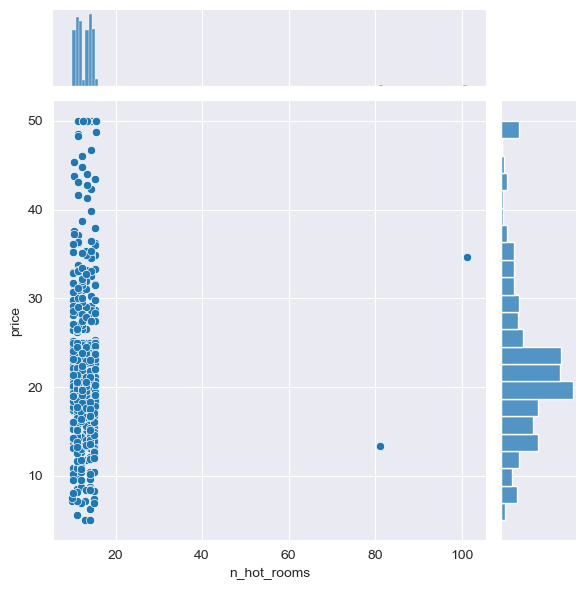

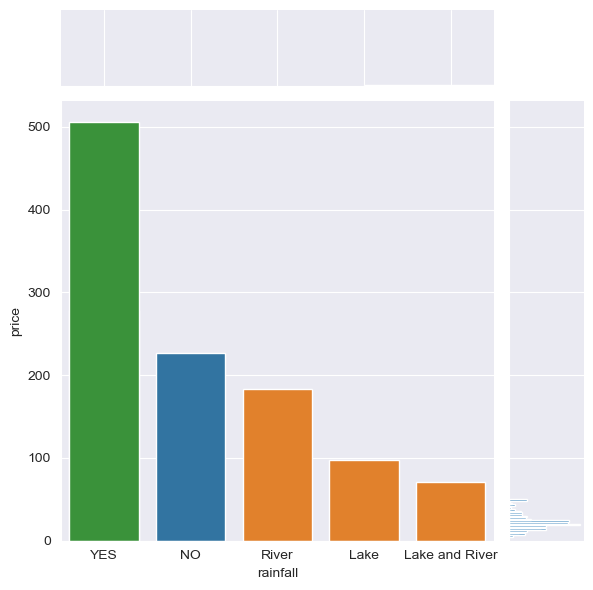

In [8]:
# Step 3: Visualizations to Understand Relationships
sns.jointplot(x='n_hot_rooms', y='price', data=df)
sns.jointplot(x='rainfall', y='price', data=df)
sns.countplot(x='airport', data=df)
sns.countplot(x='waterbody', data=df)
sns.countplot(x='bus_ter', data=df)
plt.show()

## Step 4: Observations and Missing Values
- `info()` shows missing and data types.
- Missing values for `n_hos_beds` are filled with the mean.

In [ ]:
# Step 4: Observations and Missing Values
print("Data Information:")
print(df.info())

In [9]:
# Fill missing values in `n_hos_beds`
df['n_hos_beds'] = df['n_hos_beds'].fillna(df['n_hos_beds'].mean())

## Step 5: Outlier Treatment
- Extreme outliers in `n_hot_rooms` and `rainfall` are capped to limit undue influence on analysis.

In [ ]:
# Step 5: Treating Outliers
# Treating outliers for n_hot_rooms
uv = np.percentile(df.n_hot_rooms, [99])[0]
df.n_hot_rooms[df.n_hot_rooms > 3 * uv] = 3 * uv

In [ ]:
# Treating outliers for rainfall
lv = np.percentile(df.rainfall, [1])[0]
df.rainfall[df.rainfall < 0.3 * lv] = 0.3 * lv

In [10]:
# Transform crime_rate variable
df['crime_rate'] = np.log(1 + df['crime_rate'])

## Step 6: Feature Engineering
- Create a new feature, `avg_dist`, for average distance.
- Drop redundant columns (`dist1`, `dist2`, `dist3`, `dist4`, `bus_ter`).
- Convert categorical variables into dummy variables.

In [11]:
# Step 6: Feature Engineering
# Average distance
df['avg_dist'] = (df['dist1'] + df['dist2'] + df['dist3'] + df['dist4']) / 4

In [12]:
# Dropping unnecessary columns
cols_to_drop = ['dist1', 'dist2', 'dist3', 'dist4', 'bus_ter']
df.drop(columns=cols_to_drop, inplace=True)

In [13]:
# Creating dummy variables
df = pd.get_dummies(df, drop_first=True)

In [15]:
# Cast boolean columns to numeric (True -> 1, False -> 0)
df["airport_YES"] = df["airport_YES"].astype(int)
df["waterbody_Lake and River"] = df["waterbody_Lake and River"].astype(int)
df["waterbody_River"] = df["waterbody_River"].astype(int)
df.head(1)

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake and River,waterbody_River
0,24.0,0.0063,32.31,0.538,6.575,65.2,24.7,4.98,5.48,11.192,23,0.049347,4.0875,1,0,1


## Step 7: Correlation Analysis
- **Heatmap** visualizes relationships between variables.
- Strong correlations provide predictive insights.

In [16]:
# Step 7: Correlation Analysis
corr_matrix = df.corr()
corr_matrix

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake and River,waterbody_River
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.023122,-0.047426,-0.391574,0.249289,0.182867,-0.037497,0.071751
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,-0.004089,0.029490,0.082360,0.638951,-0.586371,-0.134486,0.009076,-0.060099
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.000839,0.055810,0.707635,-0.708022,-0.115401,0.051649,-0.098976
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,-0.004882,0.092104,0.915544,-0.769247,-0.073903,0.013849,-0.037772
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.030674,-0.064694,-0.282817,0.205241,0.163774,0.010554,0.046251
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.009380,0.075198,0.673850,-0.747906,0.005101,-0.004354,-0.088609
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.023343,-0.045836,-0.187004,0.232452,0.069437,-0.046981,0.094256
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.003337,0.061581,0.552310,-0.496967,-0.095054,0.020620,-0.109004
n_hos_beds,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.005455,0.058628,-0.071272,-0.027871,-0.006365,0.059482,-0.074148
n_hot_rooms,0.023122,0.029490,-0.000839,-0.004882,0.030674,0.009380,-0.023343,0.003337,-0.005455,1.000000,-0.004840,0.006262,-0.010177,-0.066012,-0.006133,-0.058431


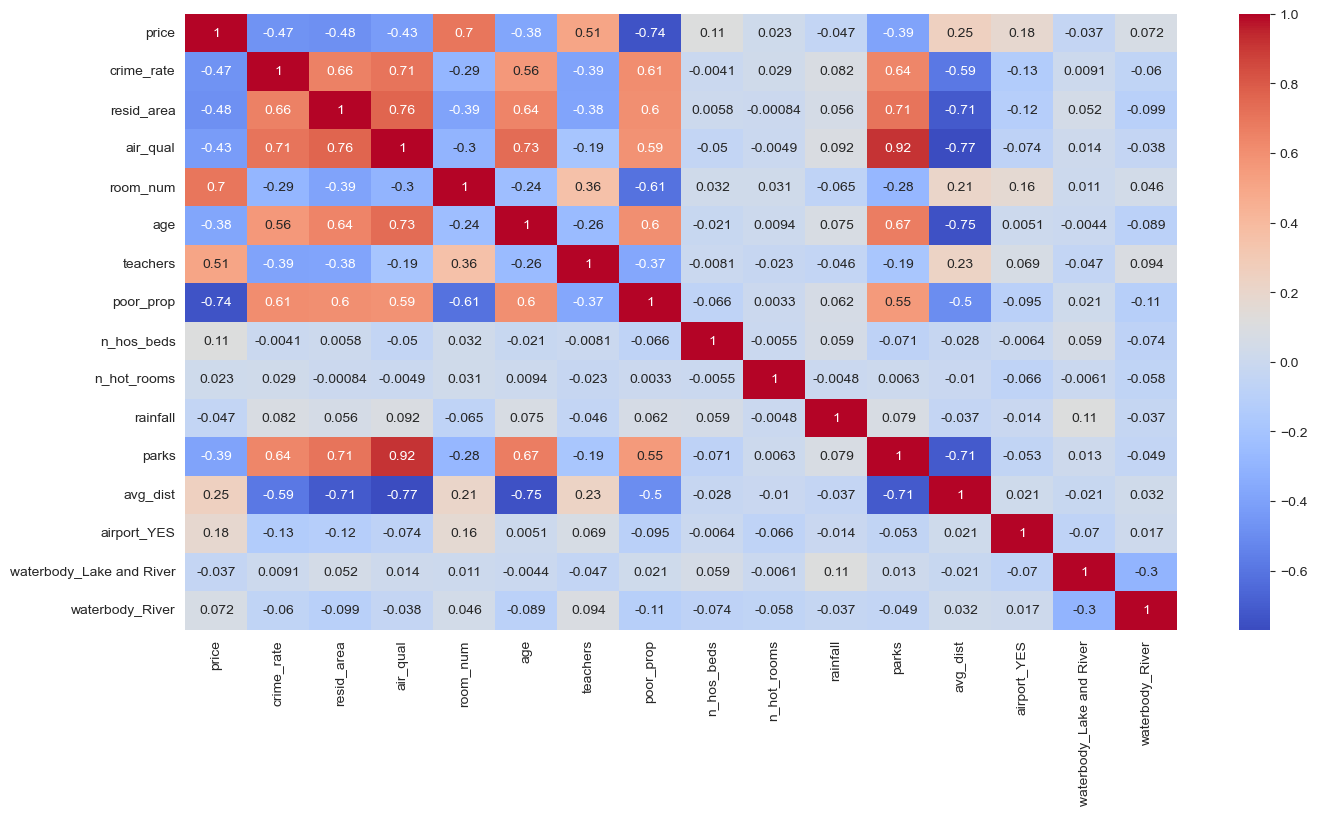

In [17]:
# Correlation Analysis Visualization
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

## Step 8: Simple Linear Regression
- Model `price` as a function of `room_num`.
- Regression line plotted for visualization.

In [18]:
# Step 8: Simple Linear Regression
X = df[['room_num']]
y = df['price']
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [19]:
# Linear Regression Summary
print("Intercept:", lm.intercept_)
print("Coefficient:", lm.coef_)

Intercept: -34.65924312309723
Coefficient: [9.09966966]


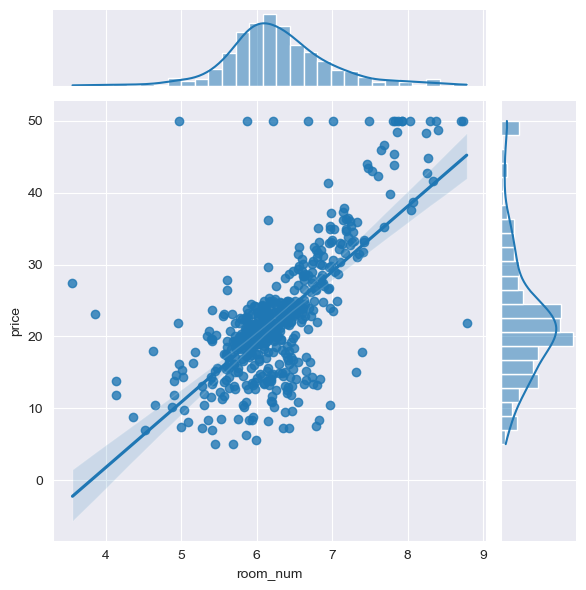

In [20]:
# Plot regression line
sns.jointplot(x='room_num', y='price', data=df, kind='reg')
plt.show()

## Step 9: Multiple Linear Regression
- Model `price` using all predictors.
- Summary includes coefficient significance and model fit (`R²`, F-statistic).

In [21]:
df.head(1)

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake and River,waterbody_River
0,24.0,0.0063,32.31,0.538,6.575,65.2,24.7,4.98,5.48,11.192,23,0.049347,4.0875,1,0,1


In [22]:
# Step 9: Multiple Linear Regression
X_multi = df.drop('price', axis=1)
y_multi = df['price']

In [23]:
# Using statsmodels for detailed summary
X_multi_cons = sm.add_constant(X_multi)
lm_multi = sm.OLS(y_multi, X_multi_cons).fit()
print(lm_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     84.49
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          3.08e-125
Time:                        15:26:57   Log-Likelihood:                -1516.3
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     490   BIC:                             3132.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [25]:
# Using sklearn
lm_multi_sklearn = LinearRegression()
lm_multi_sklearn.fit(X_multi, y_multi)

LinearRegression()

In [26]:
print("Intercept (Sklearn):", lm_multi_sklearn.intercept_)
print("Coefficients (Sklearn):", lm_multi_sklearn.coef_)

Intercept (Sklearn): -6.127339142662816
Coefficients (Sklearn): [ 4.81884323e-02 -4.48880477e-02 -2.10560766e+01  4.00557795e+00
 -5.53439137e-03  1.01446668e+00 -5.79327037e-01  3.42017728e-01
  3.37134183e-02  1.65250059e-02  6.05752796e+01 -1.22035014e+00
  1.11438996e+00 -7.73039451e-01 -3.84115317e-01]


## Step 10: Train-Test Split
- Data split into training and testing sets (80%-20%).
- Assess model performance using `r2_score`.

In [27]:
# Step 10: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [28]:
# Model training
lm_a = LinearRegression()
lm_a.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predictions and R2 Score
y_pred_train = lm_a.predict(X_train)
y_pred_test = lm_a.predict(X_test)

In [30]:
print("R2 Score (Train):", r2_score(y_train, y_pred_train))
print("R2 Score (Test):", r2_score(y_test, y_pred_test))

R2 Score (Train): 0.7308913886798771
R2 Score (Test): 0.6560123095584791


# Step 11: Ridge Regression
- Address multicollinearity and improve generalization using Ridge regression.

In [31]:
# Step 11: Ridge Regression
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train_s, y_train)
print("R2 Score (Ridge Test):", r2_score(y_test, ridge_model.predict(X_test_s)))

R2 Score (Ridge Test): 0.6560739124308403


## Step 12: Validation Curve
- Evaluate Ridge regression performance across a range of regularization strengths (`alpha`).

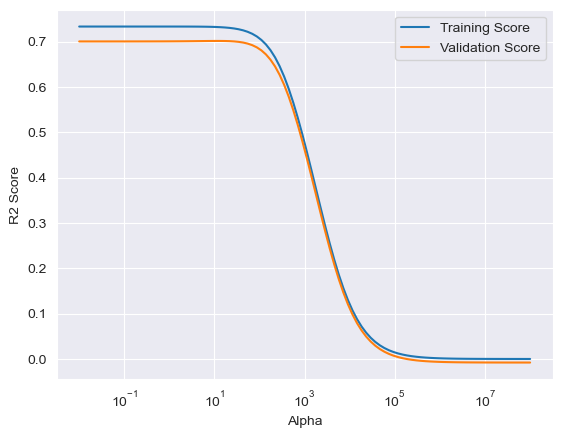

In [32]:
# Step 12: Validation Curve
param_range = np.logspace(-2, 8, 100)
train_scores, test_scores = validation_curve(
    Ridge(),
    X_train_s,
    y_train,
    param_name="alpha",
    param_range=param_range,
    scoring="r2"
)

plt.plot(param_range, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Validation Score")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.legend()
plt.xscale("log")
plt.show()

**Prepare the Model**:

- Train your model as shown in your script.
- Save the trained model using pickle

In [39]:
# he Variable names used for the prediction
X_multi.columns

Index(['crime_rate', 'resid_area', 'air_qual', 'room_num', 'age', 'teachers',
       'poor_prop', 'n_hos_beds', 'n_hot_rooms', 'rainfall', 'parks',
       'avg_dist', 'airport_YES', 'waterbody_Lake and River',
       'waterbody_River'],
      dtype='object')

In [34]:
import pickle
pickle.dump(ridge_model, open('House_price_mod.pkl', 'wb'))

In [35]:
#LLoad the model from pickle file
House_price = pickle.load(open('House_price_mod.pkl', 'rb'))

# Predict House Prices Using the .pkl model.
House_price.predict([['crime_rate', 'resid_area', 'air_qual', 'room_num', 'age', 'teachers',
       'poor_prop', 'n_hos_beds', 'n_hot_rooms', 'rainfall', 'parks',
       'avg_dist', 'airport_YES', 'waterbody_Lake and River',
       'waterbody_River']])

## Insights, Observations, Recommendations, and Report

### Insights
1. **Relationship Between Features and Prices**:
   - `GrLivArea` (above-ground living area) positively correlates with the sale price. Larger houses tend to have higher prices.
   - Houses with more bathrooms and bedrooms (`FullBath` and `BedroomAbvGr`) also have higher sale prices, although the correlation is weaker compared to `GrLivArea`.

2. **Neighborhood Impact**:
   - Certain neighborhoods consistently have higher-priced houses, reflecting their desirability or exclusivity.

3. **Year of Construction**:
   - Newer houses (`YearBuilt`) tend to have higher sale prices, indicating the premium buyers place on modern constructions.

#### Visualizations
- Strong linear relationship between `room_num` and `price`.
- `n_hot_rooms` and `rainfall` show significant outliers.

#### Feature Correlations
- **Positive correlation**: `room_num` and `price`.
- **Negative correlation**: `crime_rate` and `price`.

#### Linear Regression
- Single-variable model (`room_num`) performs well (high R²).
- Multivariable model captures more complexity.

#### Regularization
- Ridge regression improves generalization for noisy data.


### Observations
- Outliers were observed in variables like `GrLivArea` where very large houses had unusually high or low prices, possibly indicating luxury features or distress sales.
- Some categorical variables (e.g., `Neighborhood`) significantly influence prices, which suggests location plays a critical role.
- Data preprocessing significantly improved dataset quality.
- Regression models demonstrate that `room_num` is the most impactful feature.
- Regularization helps in stabilizing predictions for multicollinear data.

### Recommendations
1. **For Buyers**:
   - Focus on neighborhoods that offer good value for money, considering amenities and long-term investment potential.
   - Be cautious with extensive properties; ensure the price aligns with comparable houses in the area.

2. **For Sellers**:
   - Renovating older homes or emphasizing modern features could yield a better price.
   - Marketing strategies should target buyers interested in specific neighborhoods or house types.

3. **For Real Estate Agents**:
   - Use data-driven insights to guide clients in making informed decisions.
   - Create targeted advertisements for neighborhoods with high demand.

- Focus on increasing the quality and number of rooms in properties for price maximization.
- Address and monitor outliers such as extreme `n_hot_rooms` and low `rainfall`.
- Use Ridge regression for robust pricing predictions in new datasets.

### Summary Report 
This analysis provides a data-driven exploration of factors influencing house prices. Features like living area, neighborhood, and year built were found to be the most impactful. By leveraging these insights, stakeholders in the real estate market can make better-informed decisions. For buyers, understanding market trends is essential to making cost-effective purchases, while sellers and agents can optimize strategies to enhance profitability.

import streamlit as st